## Shell Avg Test


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/')
from noshellavg import *
from run_error_analysis import *
from plot_chain import plot_single, plot_triple
%matplotlib inline

%load_ext autoreload
%autoreload 2

/n/home00/lee.5922/.local/lib/python2.7/site-packages/subprocess32.py:472: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


In [4]:
def initialize(param_file = None):
    
    import yaml
    
    params = yaml.load(open(param_file))
    kmin, kmax, kN = params['k']
    rmin, rmax, rN = params['r']
    logscale = params['logscale']
    KMIN, KMAX = 1e-3, 2.
    lmax = params['lmax']
    parameter_ind = params['parameter_ind']  
    #parameter_ind_xi = params['parameter_ind_xi'] 

    b = 2.002
    #if 'b' in params: b = params['b']
    f = 0.745
    #if 'f' in params: f = params['f']
    s = 3.5
    if 's' in params: s = params['s']
    nn = 3.0e-04
    if 'nn' in params: nn = params['nn']
    parameter_names = np.array(['b', 'f', 's', 'nn'])

    print '-----------------------------------'
    print ' Run Error Analaysis'
    print '-----------------------------------'
    print ' parameter setting'
    print ' b={} f={} s={} nn={}'.format(b,f,s,nn)
    print ' free params :'+ str(parameter_names[parameter_ind]) 
    print ' k = [{}, {}], kN={}'.format(kmin, kmax, kN)
    print ' r = [{}, {}], rN={}'.format(rmin, rmax, rN)
    print ' lmax={}'.format(lmax)
    print '-----------------------------------'

    RSDPower = NoShell_covariance(KMIN, KMAX, rmin, rmax, 2**12 + 1, 
                                  rN, kN, b,f,s,nn,logscale = logscale)
    datavP = P_multipole(RSDPower)
    datavXi = Xi_multipole(RSDPower)
    datav = np.hstack([datavP, datavXi])
    return params, RSDPower, datav

In [5]:
params, RSDPower, datav = initialize(param_file = 'yaml/test_bf_k0_02_kN200_r18_180_rN162_p02.yaml')

-----------------------------------
 Run Error Analaysis
-----------------------------------
 parameter setting
 b=2.002 f=0.745 s=3.5 nn=0.0003
 free params :['b' 'f']
 k = [0.001, 0.2], kN=200
 r = [18, 180], rN=163
 lmax=2
-----------------------------------


In [161]:
#RSDPower.covariance_Xi_all()
Cpxi00_orig = RSDPower.covariance_PXi(0,0)
#Cpxi00_fromcxi = RSDPower.covariance_PXi_from_Cxi(2,2)

Cp00 = RSDPower.covariance_PP(0,0)
RSDPower.covariance_Xi_all()
Cx00_orig = RSDPower.covariance00

cov_P  : multiprocessing 100 % 
cov_Xi : multiprocessing 100 %

In [157]:
RSDPower.kcenter_y[70]

0.35421857731308903

In [163]:
Cpxi00 = np.fliplr(Cpxi00_orig)
Cx00 = np.flipud(np.fliplr(Cx00_orig))
Ctot0 = np.vstack((np.hstack((Cp00[:80,:80], Cpxi00[:80,:])), 
                  np.hstack((Cpxi00[:80,:].T, Cx00)) ))

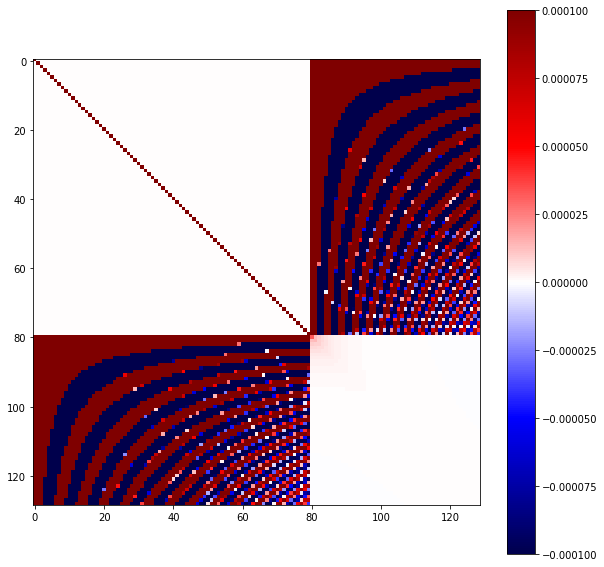

In [190]:
from utils import *
fig, ax = plt.subplots(figsize = (10,10))
#im = ax.imshow( np.log10(Cpxi))
im = ax.imshow( Ctot0, vmin = -0.0001, vmax = 0.0001, cmap='seismic')
#im = ax.imshow( correlation_matrix(Ctot0), vmin=-1, vmax=1, cmap='seismic', interpolation='none')
fig.colorbar(im,ax=ax)

In [21]:
Cpxi = np.vstack((np.hstack((Cpxi00, Cpxi02, Cpxi04)), 
                  np.hstack((Cpxi20, Cpxi22, Cpxi24)), 
                  np.hstack((Cpxi40, Cpxi42, Cpxi44))))

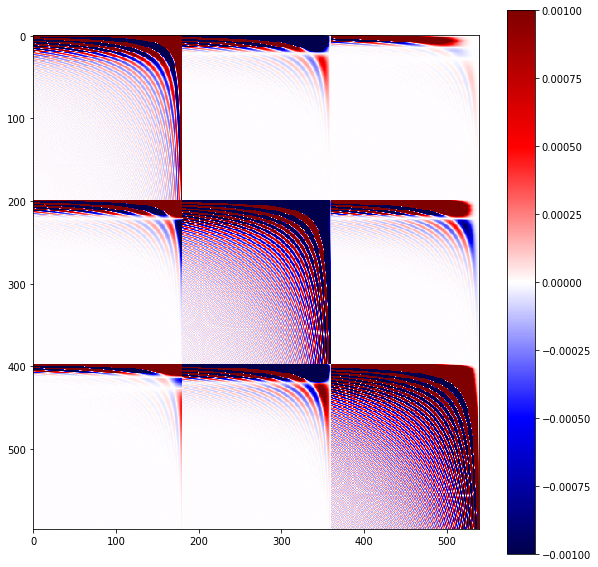

In [33]:
fig, ax = plt.subplots(figsize = (10,10))
#im = ax.imshow( np.log10(Cpxi))
im = ax.imshow( Cpxi, vmin = -0.001, vmax = 0.001, cmap='seismic')
fig.colorbar(im,ax=ax)

In [7]:
Cpxi00

array([[ -2.50996828e-01,  -2.48660767e-01,  -2.46328289e-01, ...,
         -6.02873320e-05,  -2.36633493e-05,  -5.15771999e-06],
       [ -7.83552879e-01,  -7.81802814e-01,  -7.79951686e-01, ...,
         -3.33047555e-04,  -1.30732659e-04,  -2.84957200e-05],
       [ -2.94250384e-01,  -3.02010846e-01,  -3.09698641e-01, ...,
         -5.47432354e-04,  -2.14912126e-04,  -4.68471358e-05],
       ..., 
       [ -2.91231681e-08,  -3.82585359e-08,   5.97017436e-08, ...,
          2.65795308e-06,   6.61370851e-06,   2.70972184e-06],
       [  5.77148175e-08,  -3.76939895e-08,  -2.78623793e-08, ...,
          2.51159816e-06,   6.50062114e-06,   2.68292673e-06],
       [  1.83171002e-09,   5.27346249e-08,  -4.54995450e-08, ...,
          2.36944506e-06,   6.38878484e-06,   2.65627089e-06]])

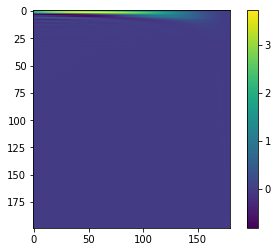

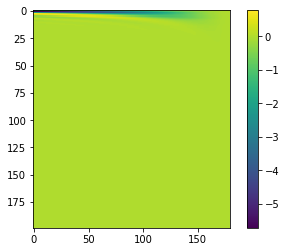

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(Cpxi00_fromcxi)
fig.colorbar(im,ax=ax)
fig, ax = plt.subplots()
im=ax.imshow(Cpxi00)
fig.colorbar(im,ax=ax)

In [ ]:
mask = np.array(np.genfromtxt('data_txt/datav/mcmc_testscale_combined_bfs_p02.mask'), dtype=bool)
datav_fid = np.genfromtxt('data_txt/datav/mcmc_testscale_combined_bfs_p02.datavector')[mask]
datav = datav[mask]
fisher = np.genfromtxt('data_txt/cov/test_bfs_k0_02_kN200_r18_180_rN162_p02_fishertot.fisher')

In [ ]:
mask.shape, datav.shape

In [67]:
mask = np.array(np.genfromtxt('data_txt/datav/mcmc_default_combined_bfs_p02.mask'), dtype=bool)
datav_fid = np.genfromtxt('data_txt/datav/mcmc_default_combined_bfs_p02.datavector')[mask]
datav = datav[mask]
fisher = np.genfromtxt('data_txt/cov/default_kN200_ke-3_rN180_re-3_bfs_p02_fishertot.fisher')

In [68]:
chisqrlist = []
difflist=[]
for i in range(datav.size):
    for j in range(datav.size):
        chi = (datav[i]-datav_fid[i]) * (datav[j]-datav_fid[j]) * fisher[i][j]
        diff = (datav[i]-datav_fid[i]) * (datav[j]-datav_fid[j])
        difflist.append(diff)
        chisqrlist.append(chi)
        

In [69]:
chisqr = np.array(chisqrlist).reshape(datav.size, datav.size)
chisqr_sum = np.sum(chisqr)

In [80]:
ind = np.argwhere( chisqr > 100.)
ind.shape

(2158, 2)

In [81]:
emptymat = np.zeros((datav.size, datav.size))
for i in range(ind.shape[0]):
    indx, indy = ind[i]
    emptymat[indx][indy] = 1.0

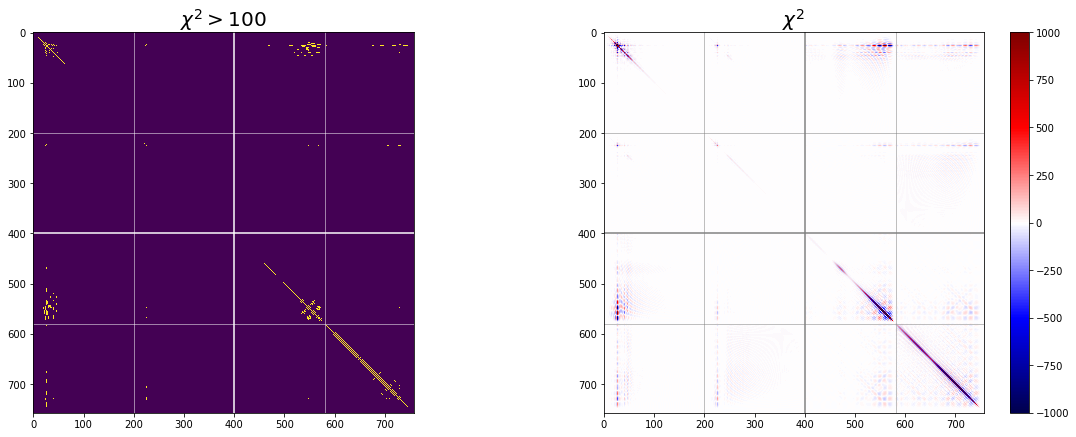

In [93]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(20,7))
im = ax.imshow(emptymat, interpolation = 'none')

ax.axhline(y = 200, color = 'w', lw=0.5)
ax.axvline(x = 200, color = 'w', lw=0.5)

ax.axhline(y = 581, color = 'w', lw=0.5)
ax.axvline(x = 581, color = 'w', lw=0.5)

ax.axhline(y = 400, color = 'w', lw=1.5)
ax.axvline(x = 400, color = 'w', lw=1.5)
ax.set_title(r'$\chi^2 > 100$', fontsize = 20)

im2 = ax2.imshow(chisqr, interpolation = 'none', vmin = -1000, vmax = 1000, cmap='seismic')
ax2.axhline(y = 200, color = 'grey', lw=0.5)
ax2.axvline(x = 200, color = 'grey', lw=0.5)

ax2.axhline(y = 581, color = 'grey', lw=0.5)
ax2.axvline(x = 581, color = 'grey', lw=0.5)

ax2.axhline(y = 400, color = 'grey', lw=1.5)
ax2.axvline(x = 400, color = 'grey', lw=1.5)
ax2.set_title(r'$\chi^2$', fontsize = 20)

#ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
#fig.colorbar(im, ax=ax)
fig.colorbar(im2, ax=ax2)



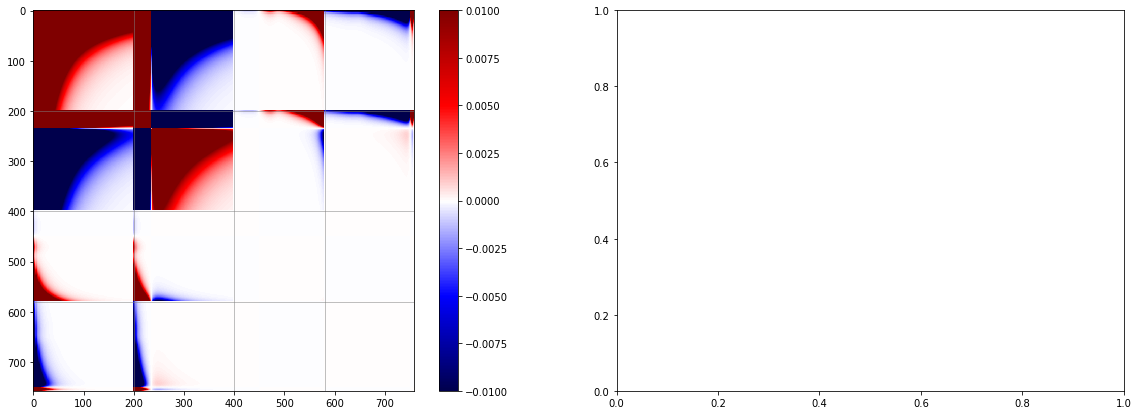

In [200]:
diffmat = np.array(difflist).reshape(datav.size, datav.size)

fig, (ax, ax2) = plt.subplots(1,2,figsize=(20,7))
im = ax.imshow(diffmat, interpolation = 'none', vmin = -.01, vmax = .01, cmap='seismic')

ax.axhline(y = 200, color = 'grey', lw=0.5)
ax.axvline(x = 200, color = 'grey', lw=0.5)

ax.axhline(y = 581, color = 'grey', lw=0.5)
ax.axvline(x = 581, color = 'grey', lw=0.5)

ax.axhline(y = 400, color = 'grey', lw=.5)
ax.axvline(x = 400, color = 'grey', lw=.5)


#ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
fig.colorbar(im, ax=ax)

In [180]:
diffmat.max(), np.mean(diffmat)

(288020.80126986804, 30.414762599923794)

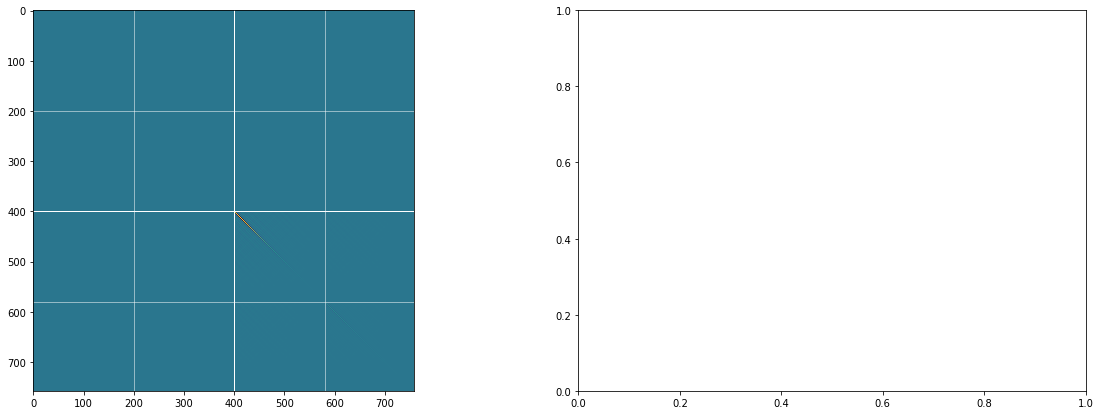

In [156]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(20,7))
im = ax.imshow(fisher, interpolation = 'none')

ax.axhline(y = 200, color = 'w', lw=0.5)
ax.axvline(x = 200, color = 'w', lw=0.5)

ax.axhline(y = 581, color = 'w', lw=0.5)
ax.axvline(x = 581, color = 'w', lw=0.5)

ax.axhline(y = 400, color = 'w', lw=1)
ax.axvline(x = 400, color = 'w', lw=1)

/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


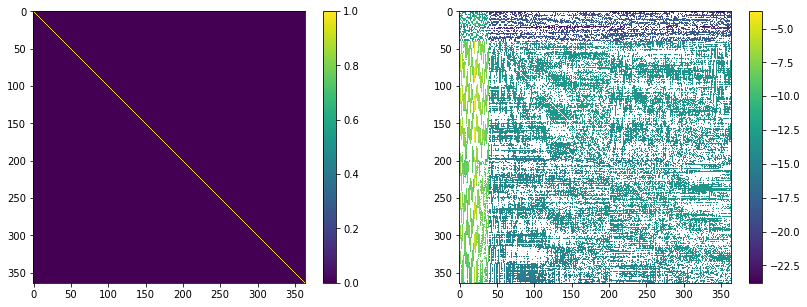

In [97]:
sanity_check = np.genfromtxt('data_txt/cov/sanity_check.txt')

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14, 5))
im = ax.imshow(sanity_check)
fig.colorbar(im, ax=ax)

np.fill_diagonal(sanity_check, 0)
im2 = ax2.imshow(np.log10(sanity_check))
fig.colorbar(im2, ax=ax2)

# Bessel Function and Shell Averaging 

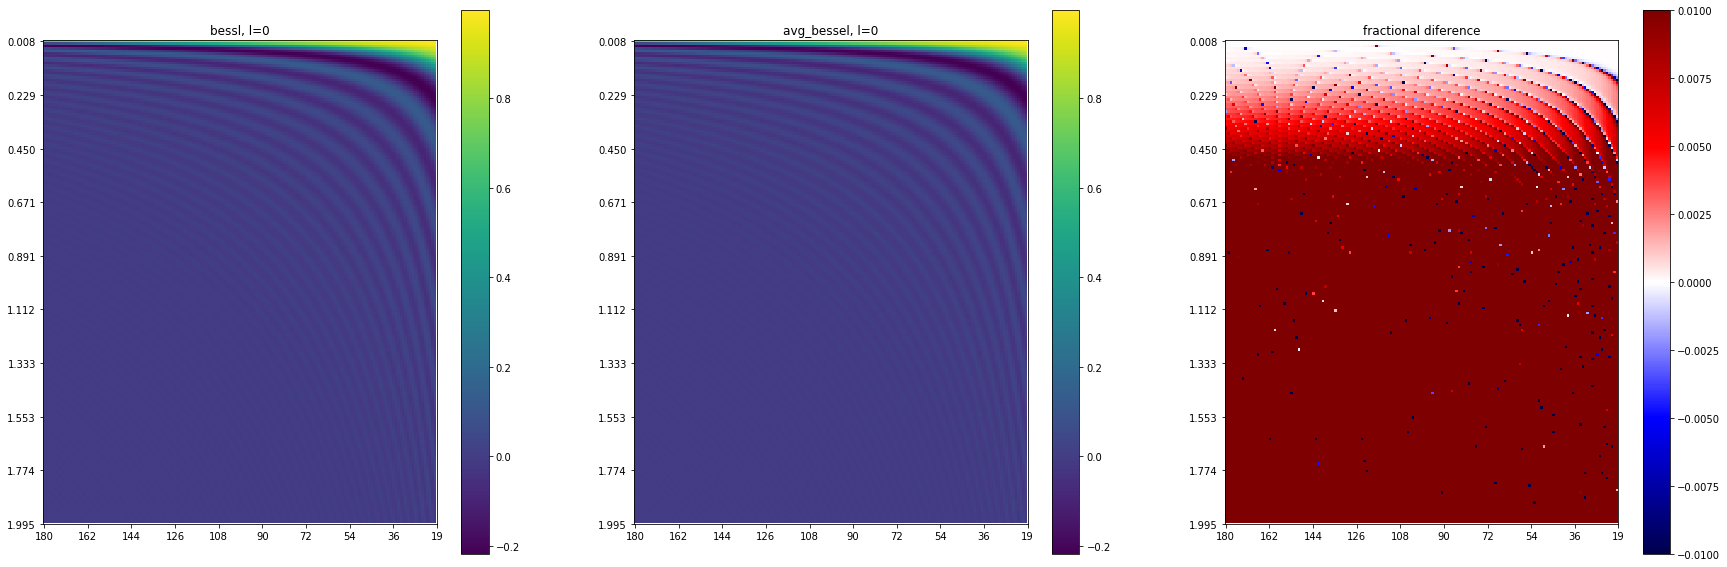

In [96]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN162_p02_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN162_p02_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess0.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel0.txt')[:kcenter.size, :rcenter.size]

fig, ax = plt.subplots(1,3, figsize = (30, 10))
ax = ax.ravel()

im = ax[0].imshow(sbess_vector)
im2 = ax[1].imshow(avgbessel)
im3 = ax[2].imshow(((sbess_vector - avgbessel)/sbess_vector), cmap='seismic', vmin = -0.01, vmax=0.01)
ax[0].set_title('bessl, l=0')
ax[1].set_title('avg_bessel, l=0')
ax[2].set_title('fractional diference')

for i in np.arange(3):
    ax[i].set_xticks(np.linspace(0, rcenter.size, 10))
    ax[i].set_yticks(np.linspace(0, kcenter.size, 10))
    rlabels = ['{:>2.0f}'.format(r) for r in np.linspace(rcenter.max(), rcenter.min(), 10) ]
    klabels = ['{:>2.3f}'.format(r) for r in np.linspace(kcenter.min(), kcenter.max(), 10) ]
    ax[i].set_xticklabels(rlabels)
    ax[i].set_yticklabels(klabels)
#ax.set_yticks(np.arange(0,kcenter.size, 10))
#ax.set_yticklabels(np.linspace(kcenter.min(), kcenter.max(), 10))
#ax.set_yticks(kcenter)


#ax2.set_xticks(rcenter)
#ax2.set_yticks(kcenter)


fig.colorbar(im, ax=ax[0])
fig.colorbar(im2, ax=ax[1])
fig.colorbar(im3, ax=ax[2])

0.207008393553
1.51281764955


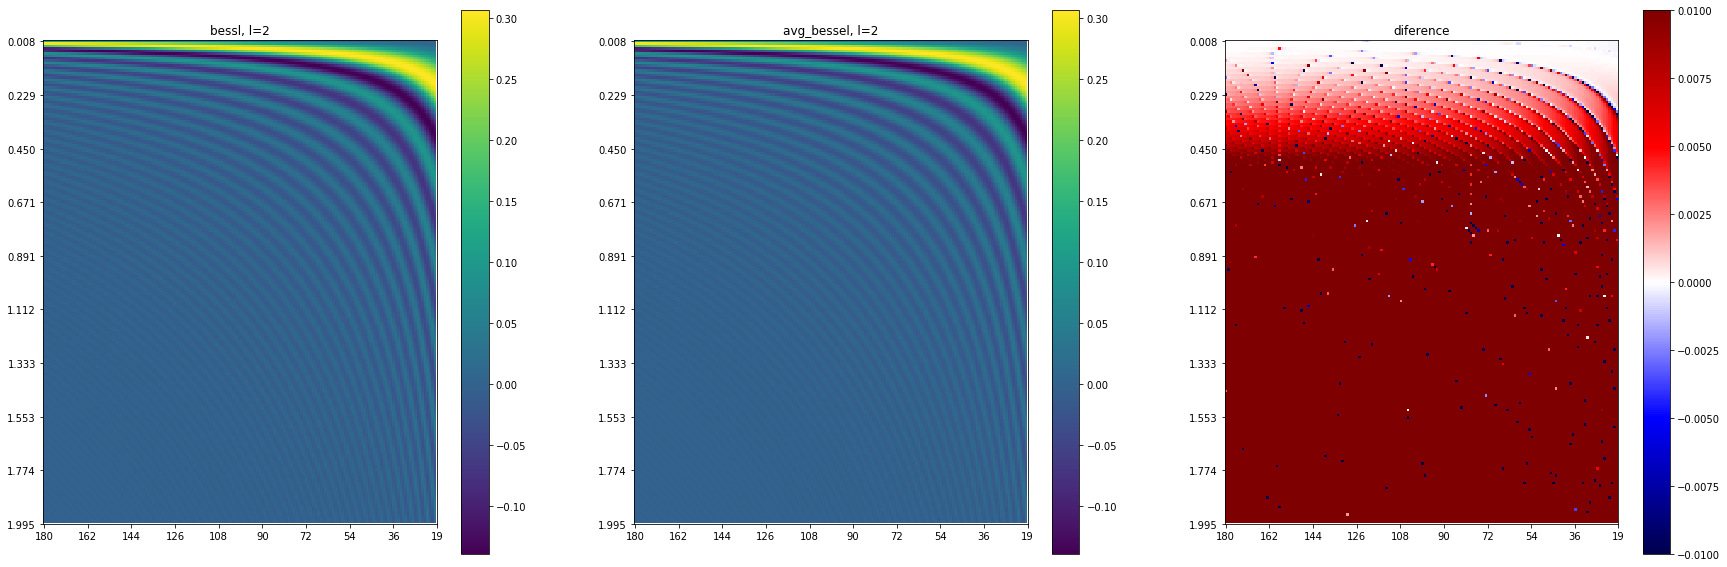

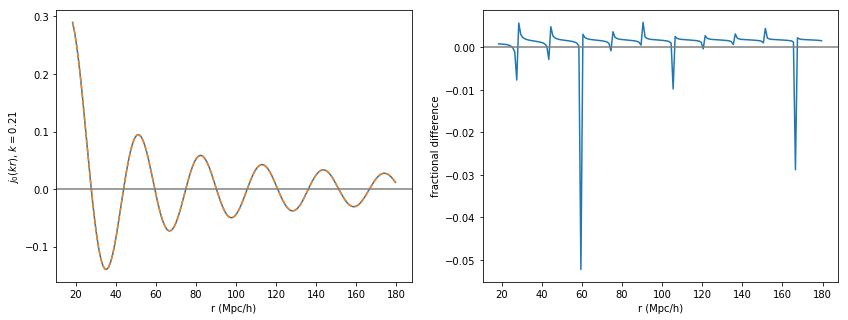

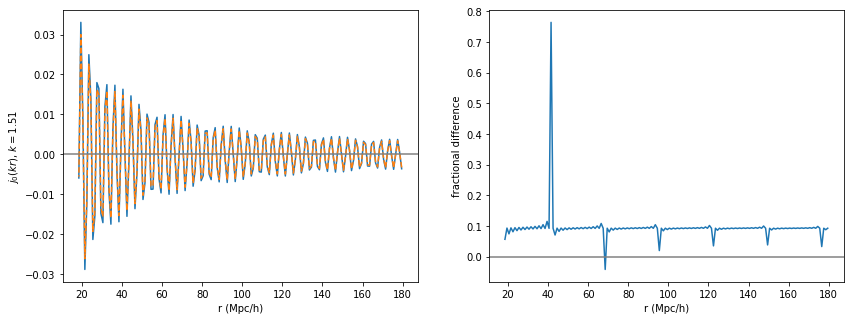

In [338]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN162_p02_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN162_p02_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess2.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel2.txt')[:kcenter.size, :rcenter.size]

fig, ax = plt.subplots(1,3, figsize = (30, 10))
ax = ax.ravel()

im = ax[0].imshow(sbess_vector)
im2 = ax[1].imshow(avgbessel)
im3 = ax[2].imshow((sbess_vector - avgbessel)/sbess_vector, cmap='seismic', vmin = -0.01, vmax=0.01)
ax[0].set_title('bessl, l=2')
ax[1].set_title('avg_bessel, l=2')
ax[2].set_title('diference')

for i in np.arange(3):
    ax[i].set_xticks(np.linspace(0, rcenter.size, 10))
    ax[i].set_yticks(np.linspace(0, kcenter.size, 10))
    rlabels = ['{:>2.0f}'.format(r) for r in np.linspace(rcenter.max(), rcenter.min(), 10) ]
    klabels = ['{:>2.3f}'.format(r) for r in np.linspace(kcenter.min(), kcenter.max(), 10) ]
    ax[i].set_xticklabels(rlabels)
    ax[i].set_yticklabels(klabels)
#ax.set_yticks(np.arange(0,kcenter.size, 10))
#ax.set_yticklabels(np.linspace(kcenter.min(), kcenter.max(), 10))
#ax.set_yticks(kcenter)
#ax2.set_xticks(rcenter)
#ax2.set_yticks(kcenter)


fig.colorbar(im, ax=ax[0])
fig.colorbar(im2, ax=ax[1])
fig.colorbar(im3, ax=ax[2])

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 20
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j0')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j0')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')


fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 150
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j0')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j0')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

0.13810913431


ValueError: x and y must have same first dimension, but have shapes (262,) and (162,)

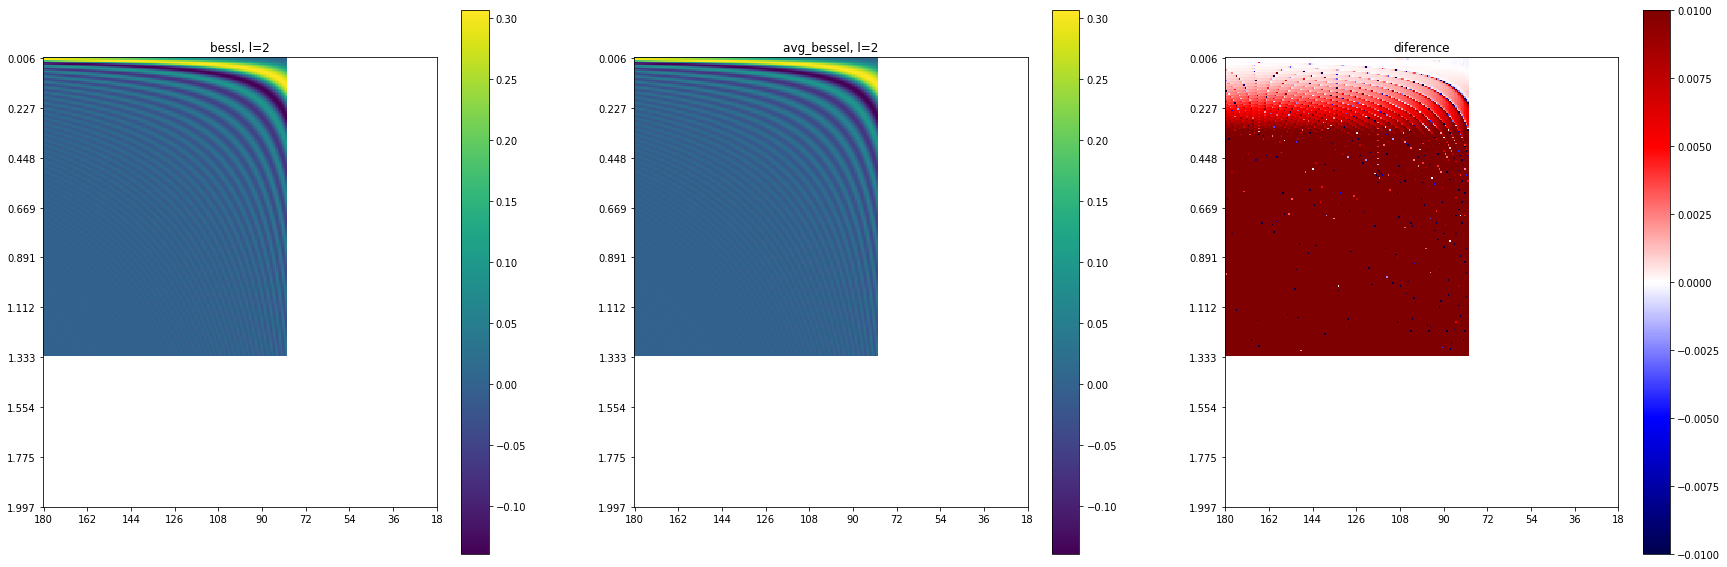

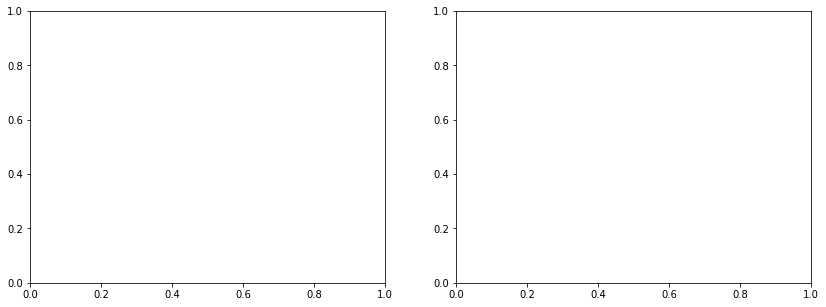

In [339]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN300_r18_180_rN262_p02_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN300_r18_180_rN262_p02_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess2.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel2.txt')[:kcenter.size, :rcenter.size]

fig, ax = plt.subplots(1,3, figsize = (30, 10))
ax = ax.ravel()

im = ax[0].imshow(sbess_vector)
im2 = ax[1].imshow(avgbessel)
im3 = ax[2].imshow((sbess_vector - avgbessel)/sbess_vector, cmap='seismic', vmin = -0.01, vmax=0.01)
ax[0].set_title('bessl, l=2')
ax[1].set_title('avg_bessel, l=2')
ax[2].set_title('diference')

for i in np.arange(3):
    ax[i].set_xticks(np.linspace(0, rcenter.size, 10))
    ax[i].set_yticks(np.linspace(0, kcenter.size, 10))
    rlabels = ['{:>2.0f}'.format(r) for r in np.linspace(rcenter.max(), rcenter.min(), 10) ]
    klabels = ['{:>2.3f}'.format(r) for r in np.linspace(kcenter.min(), kcenter.max(), 10) ]
    ax[i].set_xticklabels(rlabels)
    ax[i].set_yticklabels(klabels)
#ax.set_yticks(np.arange(0,kcenter.size, 10))
#ax.set_yticklabels(np.linspace(kcenter.min(), kcenter.max(), 10))
#ax.set_yticks(kcenter)
#ax2.set_xticks(rcenter)
#ax2.set_yticks(kcenter)


fig.colorbar(im, ax=ax[0])
fig.colorbar(im2, ax=ax[1])
fig.colorbar(im3, ax=ax[2])

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 20
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j0')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j0')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')


fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 225
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j0')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j0')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

1.9849406335
0.106632707818


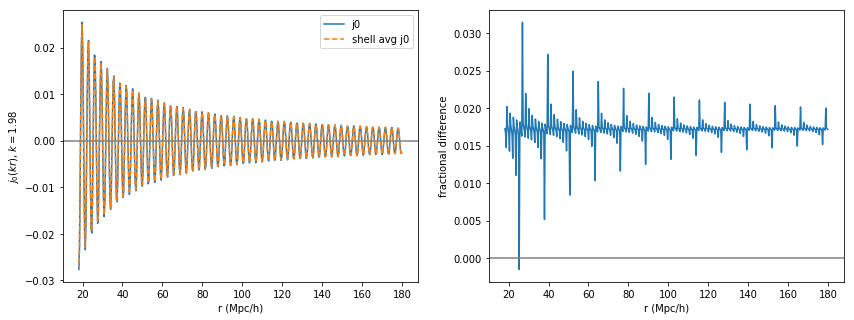

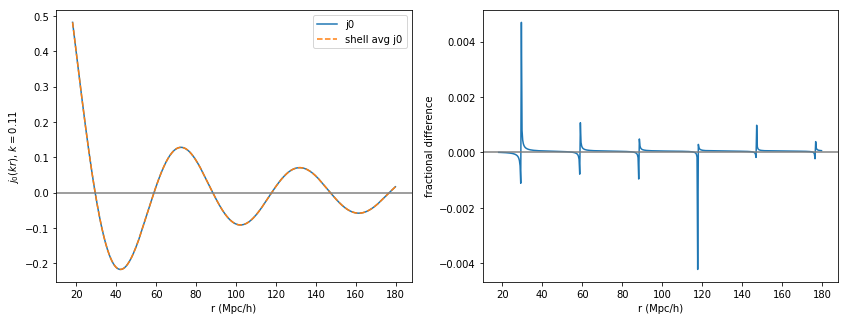

In [126]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN500_p02_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN500_p02_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess0.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel0.txt')[:kcenter.size, :rcenter.size]

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 197
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j0')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j0')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax.legend(loc='best')
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')


fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 10
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j0')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j0')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax.legend(loc='best')
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

1.9849406335
0.106632707818


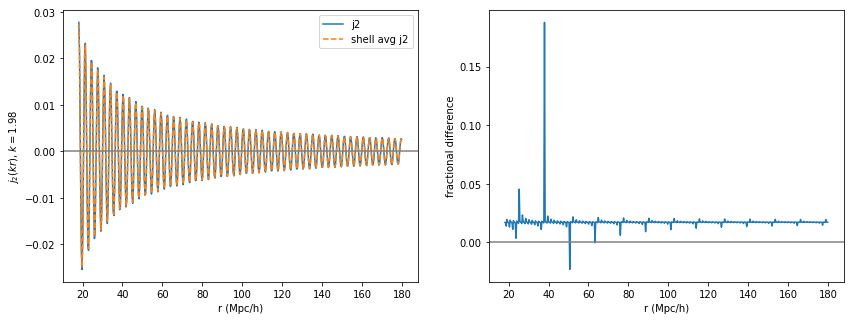

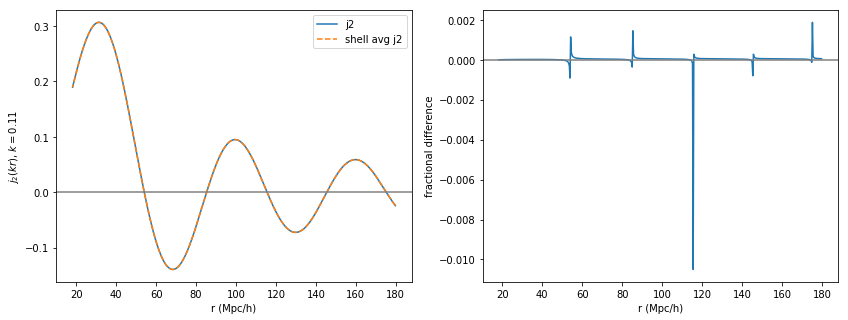

In [128]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN500_p02_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN500_p02_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess2.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel2.txt')[:kcenter.size, :rcenter.size]

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 197
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j2')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_2(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 10
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j2')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_2(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax.legend(loc='best')
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

## Cov_xi matrix test

147.372864687
82.4430988423
33.7460115273


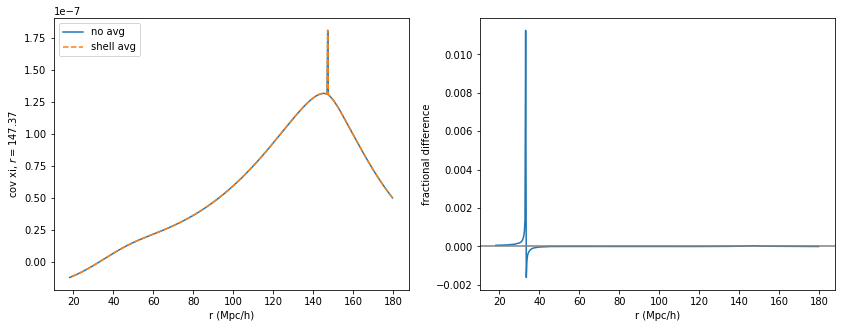

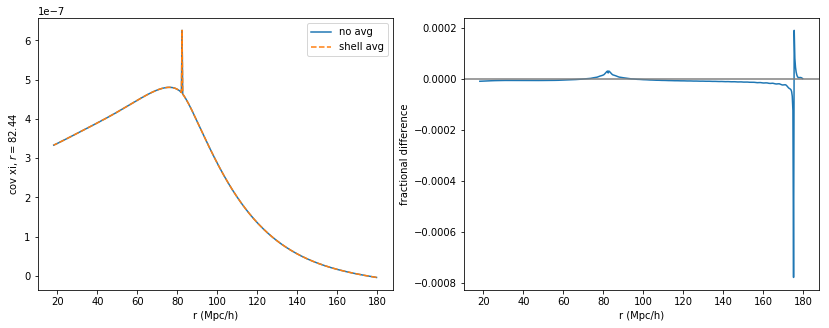

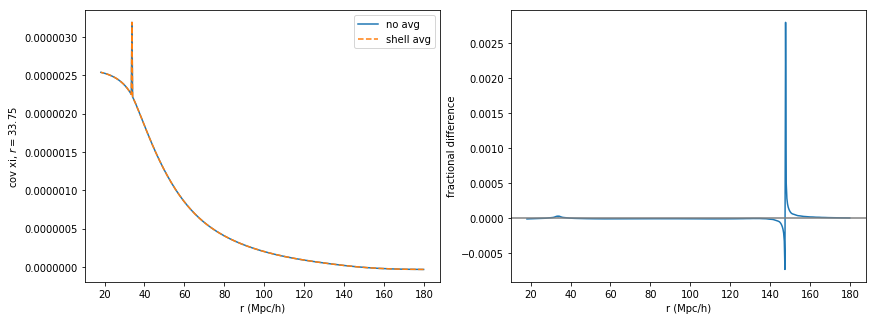

In [157]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN500_p02_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN500_p02_rcenter.txt')
covxi0 = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN200_r18_180_rN500_p02_Xi.cov')[:rcenter.size, :rcenter.size]
covxi0_avg = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN200_r18_180_rN500_p02_shellavg_Xi.cov')[:rcenter.size, :rcenter.size]
#sbess_vector = np.genfromtxt('data_txt/bessel_sbess2.txt')[:kcenter.size, :rcenter.size]
#avgbessel = np.genfromtxt('data_txt/bessel_avgbessel2.txt')[:kcenter.size, :rcenter.size]

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 100
print rcenter[kind]
ax.plot(rcenter, covxi0[kind, :], label = 'no avg')
#ax.plot(rcenter, covxi0[kind+300, :], 'r-', label = '')
ax.plot(rcenter, covxi0_avg[kind, :], '--', label = 'shell avg')
#ax.plot(rcenter, covxi0_avg[kind+300, :], 'r--', label = '')
#ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
#ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'cov xi, $r={:0.2f}$'.format(rcenter[kind]))
ax2.plot(rcenter, (covxi0[kind, :]-covxi0_avg[kind, :])/covxi0[kind, :] )
#ax2.plot(rcenter, (covxi0[kind+300, :]-covxi0_avg[kind+300, :])/covxi0[kind+300, :] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 300
print rcenter[kind]
ax.plot(rcenter, covxi0[kind, :], label = 'no avg')
#ax.plot(rcenter, covxi0[kind+300, :], 'r-', label = '')
ax.plot(rcenter, covxi0_avg[kind, :], '--', label = 'shell avg')
#ax.plot(rcenter, covxi0_avg[kind+300, :], 'r--', label = '')
#ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
#ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'cov xi, $r={:0.2f}$'.format(rcenter[kind]))
ax2.plot(rcenter, (covxi0[kind, :]-covxi0_avg[kind, :])/covxi0[kind, :] )
#ax2.plot(rcenter, (covxi0[kind+300, :]-covxi0_avg[kind+300, :])/covxi0[kind+300, :] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 450
print rcenter[kind]
ax.plot(rcenter, covxi0[kind, :], label = 'no avg')
#ax.plot(rcenter, covxi0[kind+300, :], 'r-', label = '')
ax.plot(rcenter, covxi0_avg[kind, :], '--', label = 'shell avg')
#ax.plot(rcenter, covxi0_avg[kind+300, :], 'r--', label = '')
#ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
#ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'cov xi, $r={:0.2f}$'.format(rcenter[kind]))
ax2.plot(rcenter, (covxi0[kind, :]-covxi0_avg[kind, :])/covxi0[kind, :] )
#ax2.plot(rcenter, (covxi0[kind+300, :]-covxi0_avg[kind+300, :])/covxi0[kind+300, :] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

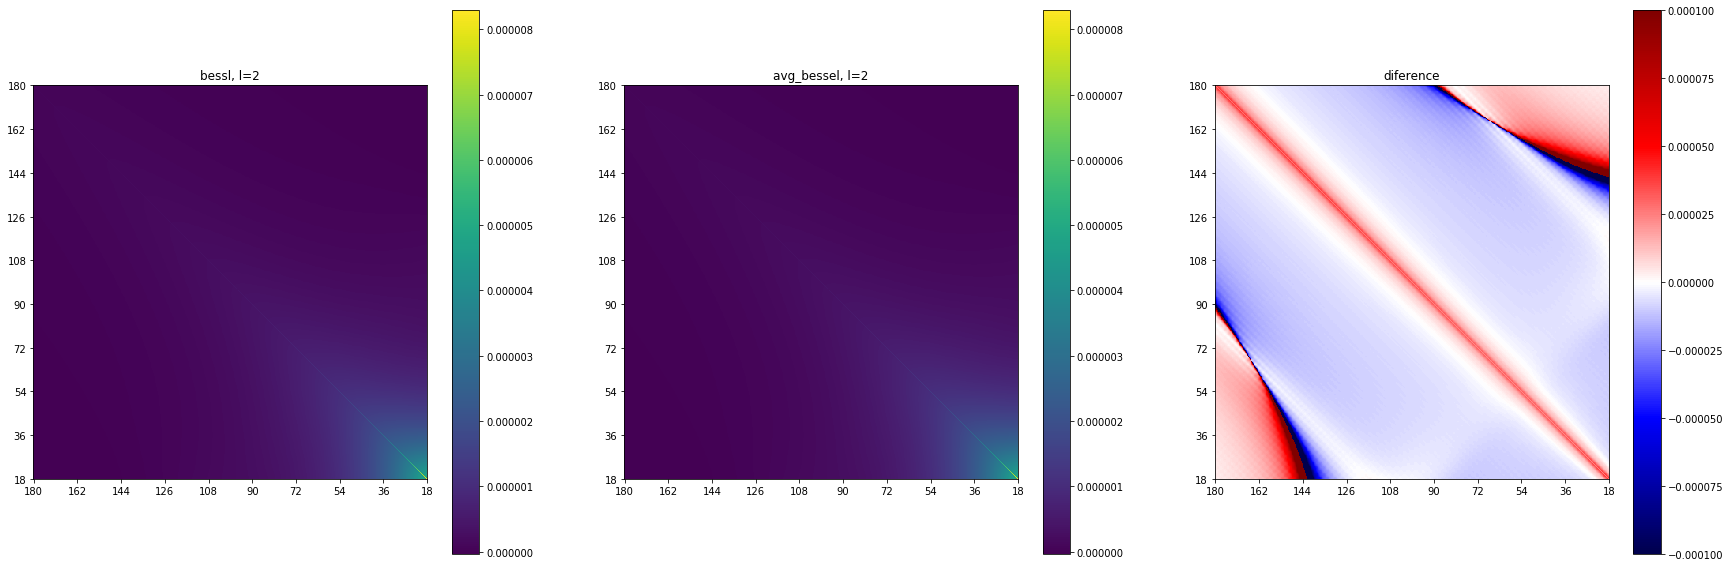

In [160]:
fig, ax = plt.subplots(1,3, figsize = (30, 10))
ax = ax.ravel()

im = ax[0].imshow(covxi0)
im2 = ax[1].imshow(covxi0_avg)
im3 = ax[2].imshow((covxi0 - covxi0_avg)/covxi0, cmap='seismic', vmin = -0.0001, vmax=0.0001)
ax[0].set_title('bessl, l=2')
ax[1].set_title('avg_bessel, l=2')
ax[2].set_title('diference')

for i in np.arange(3):
    ax[i].set_xticks(np.linspace(0, rcenter.size, 10))
    ax[i].set_yticks(np.linspace(0, rcenter.size, 10))
    rlabels = ['{:>2.0f}'.format(r) for r in np.linspace(rcenter.max(), rcenter.min(), 10) ]
    klabels = ['{:>2.3f}'.format(r) for r in np.linspace(rcenter.min(), rcenter.max(), 10) ]
    ax[i].set_xticklabels(rlabels)
    ax[i].set_yticklabels(rlabels)


fig.colorbar(im, ax=ax[0])
fig.colorbar(im2, ax=ax[1])
fig.colorbar(im3, ax=ax[2])

## Cov Pxi test

1.9849406335
0.106632707818


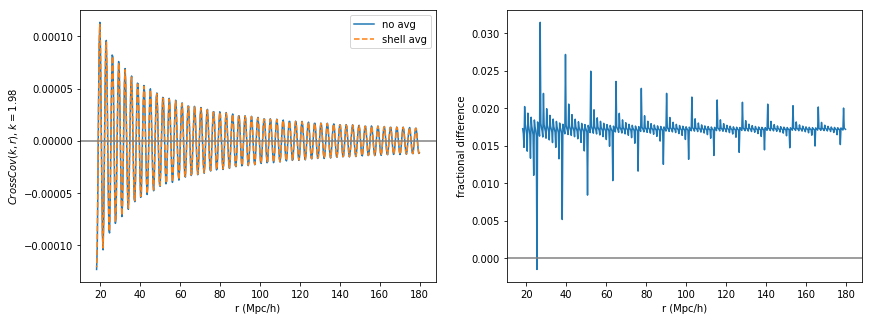

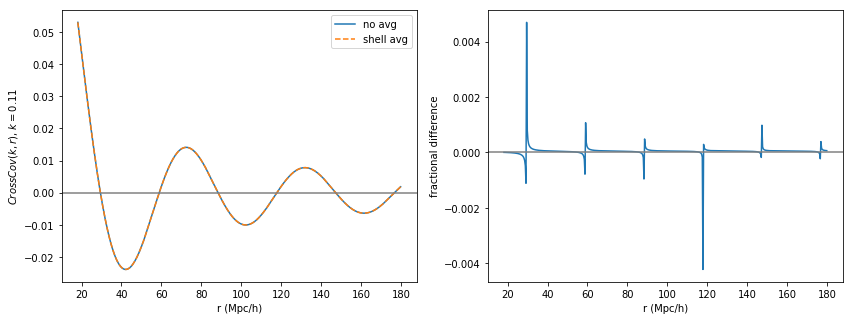

In [169]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN500_p02_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN200_r18_180_rN500_p02_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess2.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel2.txt')[:kcenter.size, :rcenter.size]
covpxi0 = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN200_r18_180_rN500_p02_PXi.cov')[:kcenter.size, :rcenter.size]
covpxi0_avg = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN200_r18_180_rN500_p02_shellavg_PXi.cov')[:kcenter.size, :rcenter.size]

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 197
print kcenter[kind]
ax.plot(rcenter, covpxi0[kind, :], label = 'no avg')
ax.plot(rcenter, covpxi0_avg[kind, :], '--', label = 'shell avg')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$Cross Cov(k,r)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (covpxi0[kind, :]-covpxi0_avg[kind, :])/covpxi0[kind, :] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')


fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 10
print kcenter[kind]
ax.plot(rcenter, covpxi0[kind, :], label = 'no avg')
ax.plot(rcenter, covpxi0_avg[kind, :], '--', label = 'shell avg')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$Cross Cov(k,r)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (covpxi0[kind, :]-covpxi0_avg[kind, :])/covpxi0[kind, :] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

0.792190751076
0.0431251923741


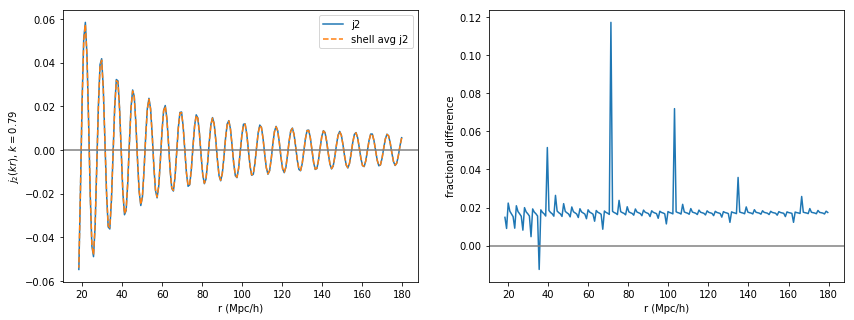

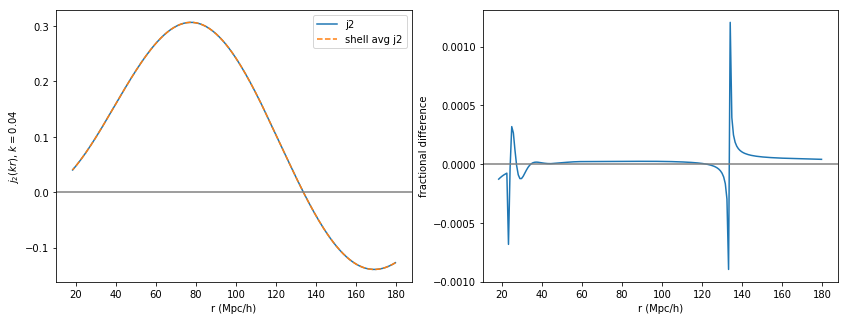

In [171]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess2.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel2.txt')[:kcenter.size, :rcenter.size]

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 197
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j2')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_2(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 10
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j2')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_2(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax.legend(loc='best')
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

IndexError: index 395 is out of bounds for axis 0 with size 199

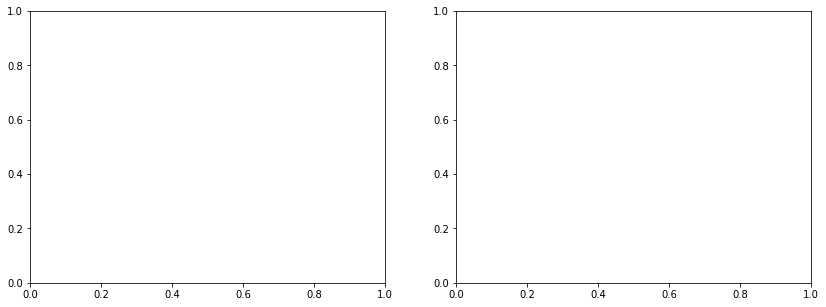

In [182]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess2.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel2.txt')[:kcenter.size, :rcenter.size]

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 395
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j2')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_2(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')
ax2.set_ylim(0, 0.04)

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 10
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j2')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_2(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax.legend(loc='best')
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

115.282365137
0.0220408085296


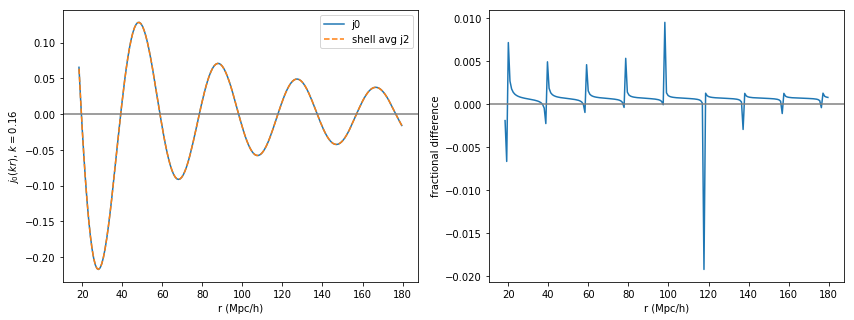

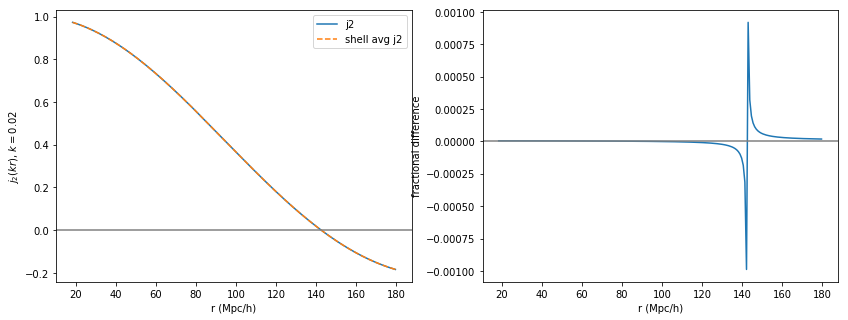

In [215]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess0.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel0.txt')[:kcenter.size, :rcenter.size]

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 79
print rcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j0')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')
#ax2.set_ylim(0, 0.04)



fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 10
print kcenter[kind]
ax.plot(rcenter, sbess_vector[kind, :], label = 'j2')
ax.plot(rcenter, avgbessel[kind, :], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$j_2(kr)$, $k={:0.2f}$'.format(kcenter[kind]))
ax.legend(loc='best')
ax2.plot(rcenter, (sbess_vector[kind, :]-avgbessel[kind, :])/sbess_vector[kind, :] )
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

In [205]:
sbess_vector.shape

(999, 199)

138.890242483


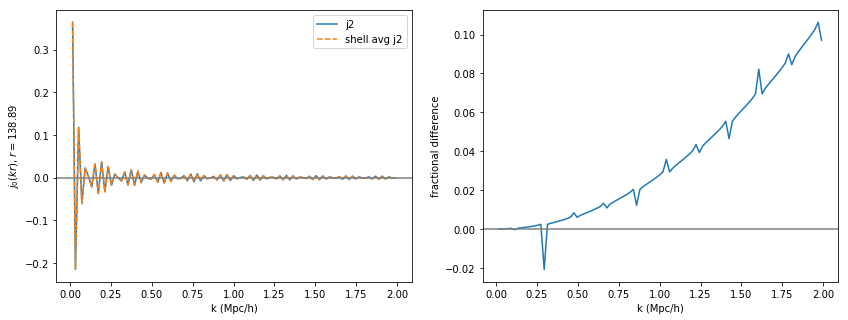

In [220]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess0.txt')#[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel0.txt')#[:kcenter.size, :rcenter.size]


fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 50
print rcenter[kind]
ax.plot(kcenter, sbess_vector[:,kind], label = 'j2')
ax.plot(kcenter, avgbessel[:, kind], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('k (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $r={:0.2f}$'.format(rcenter[kind]))
ax2.plot(kcenter, (sbess_vector[:, kind]-avgbessel[:, kind])/sbess_vector[:, kind] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('k (Mpc/h)')
ax2.set_ylabel('fractional difference')



138.890242483


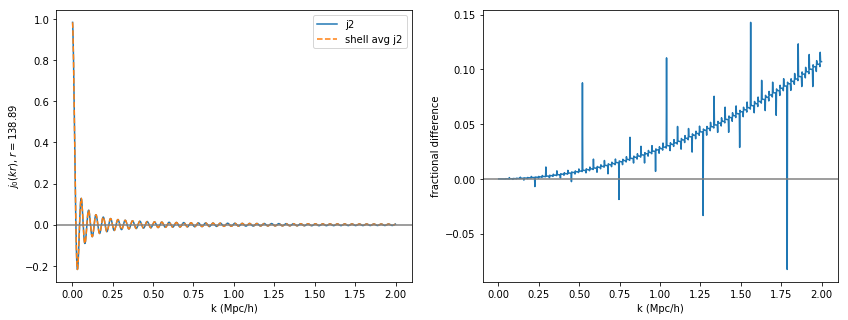

In [221]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess0.txt')#[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel0.txt')#[:kcenter.size, :rcenter.size]


fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 50
print rcenter[kind]
ax.plot(kcenter, sbess_vector[:,kind], label = 'j2')
ax.plot(kcenter, avgbessel[:, kind], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('k (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $r={:0.2f}$'.format(rcenter[kind]))
ax2.plot(kcenter, (sbess_vector[:, kind]-avgbessel[:, kind])/sbess_vector[:, kind] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('k (Mpc/h)')
ax2.set_ylabel('fractional difference')


137.958043162


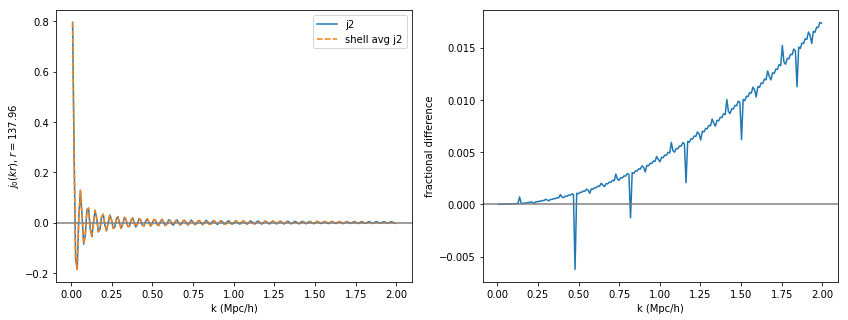

In [228]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_shellavg_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess0.txt')#[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel0.txt')#[:kcenter.size, :rcenter.size]


fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 129
print rcenter[kind]
ax.plot(kcenter, sbess_vector[:,kind], label = 'j2')
ax.plot(kcenter, avgbessel[:, kind], '--', label = 'shell avg j2')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('k (Mpc/h)')
ax.set_ylabel(r'$j_0(kr)$, $r={:0.2f}$'.format(rcenter[kind]))
ax2.plot(kcenter, (sbess_vector[:, kind]-avgbessel[:, kind])/sbess_vector[:, kind] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('k (Mpc/h)')
ax2.set_ylabel('fractional difference')



138.890242483
33.0636422567


(-0.05, 0.13)

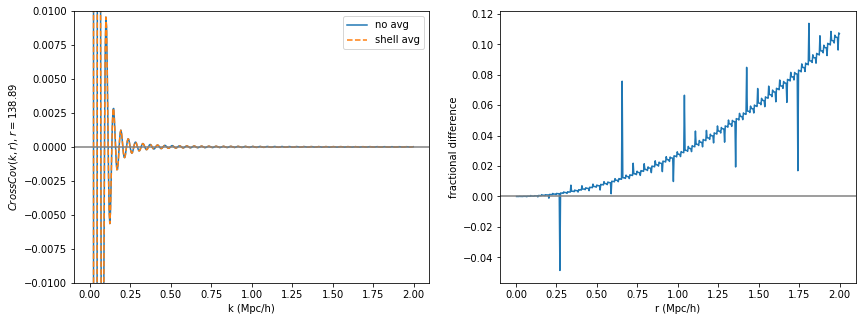

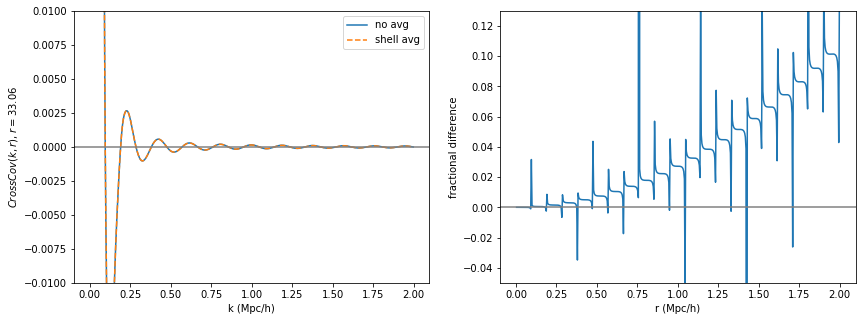

In [249]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_s0_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r18_180_rN200_p02_s0_rcenter.txt')
sbess_vector = np.genfromtxt('data_txt/bessel_sbess2.txt')[:kcenter.size, :rcenter.size]
avgbessel = np.genfromtxt('data_txt/bessel_avgbessel2.txt')[:kcenter.size, :rcenter.size]
covpxi0 = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN500_r18_180_rN200_p02_s0_PXi.cov')[:kcenter.size, :rcenter.size]
covpxi0_avg = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN500_r18_180_rN200_p02_s0_shellavg_PXi.cov')[:kcenter.size, :rcenter.size]

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 50
print rcenter[kind]
ax.plot(kcenter, covpxi0[:, kind], label = 'no avg')
ax.plot(kcenter, covpxi0_avg[:, kind], '--', label = 'shell avg')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('k (Mpc/h)')
ax.set_ylabel(r'$Cross Cov(k,r)$, $r={:0.2f}$'.format(rcenter[kind]))
ax.set_ylim(-0.01, 0.01)
ax2.plot(kcenter, (covpxi0[:, kind]-covpxi0_avg[:, kind])/covpxi0[:, kind] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14,5))
kind = 180
print rcenter[kind]
ax.plot(kcenter, covpxi0[:, kind], label = 'no avg')
ax.plot(kcenter, covpxi0_avg[:, kind], '--', label = 'shell avg')
ax.axhline(y=0.0, color='grey')
ax.set_xlabel('k (Mpc/h)')
ax.set_ylabel(r'$Cross Cov(k,r)$, $r={:0.2f}$'.format(rcenter[kind]))
ax.set_ylim(-0.01, 0.01)
ax2.plot(kcenter, (covpxi0[:, kind]-covpxi0_avg[:, kind])/covpxi0[:, kind] )
ax.legend(loc='best')
ax2.axhline(y=0.0, color = 'grey')
ax2.set_xlabel('r (Mpc/h)')
ax2.set_ylabel('fractional difference')
ax2.set_ylim(-0.05, 0.13)

### Ratio, covPxi, covXi

In [354]:
kcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r0_200_rN40_p02_s0_kcenter.txt')
rcenter = np.genfromtxt('data_txt/test_bf_k0_02_kN500_r0_200_rN40_p02_s0_rcenter.txt')
#covxi0 = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN200_r18_180_rN500_p02_Xi.cov')[:rcenter.size, :rcenter.size]
covxi0_orig = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN500_r0_200_rN40_p02_s0_Xi.cov')[:rcenter.size, :rcenter.size]
#covpxi0 = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN500_r18_180_rN200_p02_s0_PXi.cov')[:kcenter.size, :rcenter.size]
covpxi0_orig = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN500_r0_200_rN40_p02_s0_PXi.cov')[:kcenter.size, :rcenter.size]
covp0 = np.genfromtxt('data_txt/cov/test_bf_k0_02_kN500_r0_200_rN40_p02_s0_PP.cov')[:kcenter.size, :kcenter.size]


In [355]:
covpxi0 = np.fliplr(covpxi0_orig)
covxi0 = np.flipud(np.fliplr(covxi0_orig))
Ctot0 = np.vstack((np.hstack((covp0[:71,:71], covpxi0[:71,:])), 
                  np.hstack((covpxi0[:71,:].T, covxi0)) ))

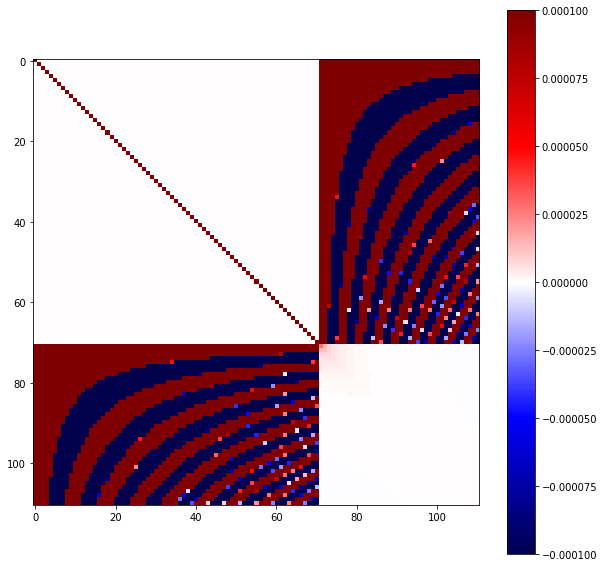

In [308]:
from utils import *
fig, ax = plt.subplots(figsize = (10,10))
#im = ax.imshow( np.log10(Cpxi))
im = ax.imshow( Ctot0, vmin = -0.0001, vmax = 0.0001, cmap='seismic')
#im = ax.imshow( correlation_matrix(Ctot0), vmin=-1, vmax=1, cmap='seismic', interpolation='none')
fig.colorbar(im,ax=ax)

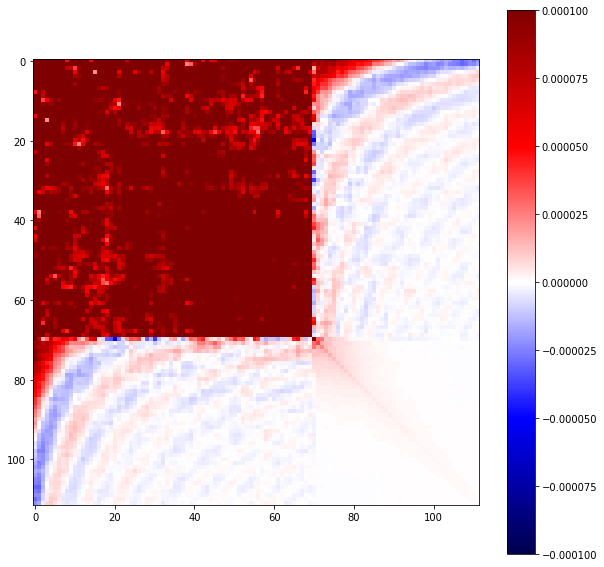

In [278]:
Ashley_mat = np.genfromtxt('Ashley_mat.dat')
from utils import *
fig, ax = plt.subplots(figsize = (10,10))
#im = ax.imshow( np.log10(Cpxi))
im = ax.imshow( Ashley_mat, vmin = -0.0001, vmax = 0.0001, cmap='seismic', interpolation='none')
#im = ax.imshow( correlation_matrix(Ashley_mat), vmin=-1, vmax=1, cmap='seismic')
fig.colorbar(im,ax=ax)

In [292]:
covp_A[-3][-3], covp_A[-2][-2], covp_A[-1][-1], covxi_A[0][0], covxi_A[1][1], covxi_A[2][2], covxi_A[3][3]

(0.00074324299999999999,
 0.00072018699999999995,
 0.00074651800000000005,
 0.00026641099999999998,
 3.7255800000000003e-05,
 2.3130100000000001e-05,
 1.7512200000000002e-05)

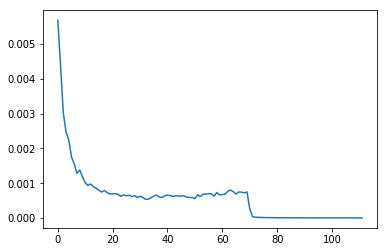

In [293]:
fig, ax = plt.subplots()
ax.plot(np.arange(Ashley_mat.shape[0]), Ashley_mat.diagonal())

In [294]:
Ashley_mat.diagonal()[:71].shape, Ashley_mat.diagonal()[71:].shape

((71,), (41,))

In [298]:
_, s = np.linspace(0.0, 2, 501, retstep = True)

In [299]:
s

0.0040000000000000001

In [351]:
covp_A.shape, covxi_A.shape

((71, 71), (41, 41))

In [356]:
m1, m2 = np.mgrid[0:kcenter.size, 0:rcenter.size]
PP = covp0.diagonal()[m1]
XX = covxi0.diagonal()[m2]
PPXX = (PP * XX)[:71,:]
ratio = (covpxi0[:71,:]/np.sqrt(PPXX))

covp_A = Ashley_mat[:71, :71]
covpxi_A = Ashley_mat[:71, 71:]
covxi_A = Ashley_mat[71:,71:]

m1, m2 = np.mgrid[0:71, 0:41]
PPA = covp_A.diagonal()[m1]
XXA = covxi_A.diagonal()[m2]
PPXXA = (PPA * XXA)
ratio_A = (covpxi_A[:71,:]/np.sqrt(PPXXA))

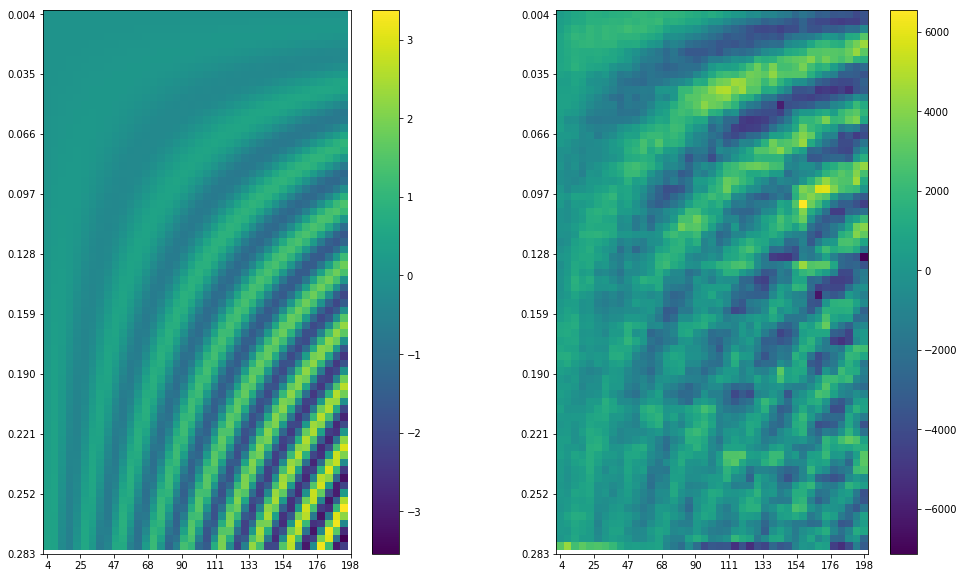

In [335]:
from utils import *
fig, (ax, ax2) = plt.subplots(1,2, figsize = (17,10))
im = ax.imshow(ratio)
im2 = ax2.imshow(ratio_A)
fig.colorbar(im,ax=ax)
fig.colorbar(im2,ax=ax2)

ax.set_xticks(np.linspace(0, rcenter.size, 10))
ax.set_yticks(np.linspace(0, kcenter[0:71].size, 10))
klabels = ['{:>2.3f}'.format(r) for r in np.linspace(kcenter[0:71].min(), kcenter[0:71].max(), 10) ]
rlabels = ['{:>2.0f}'.format(r) for r in np.linspace(rcenter.min(), rcenter.max(), 10) ]
ax.set_xticklabels(rlabels)
ax.set_yticklabels(klabels)

ax2.set_xticks(np.linspace(0, rcenter.size, 10))
ax2.set_yticks(np.linspace(0, kcenter[0:71].size, 10))
ax2.set_xticklabels(rlabels)
ax2.set_yticklabels(klabels)

In [363]:
covpxi_A.shape

(71, 41)

/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


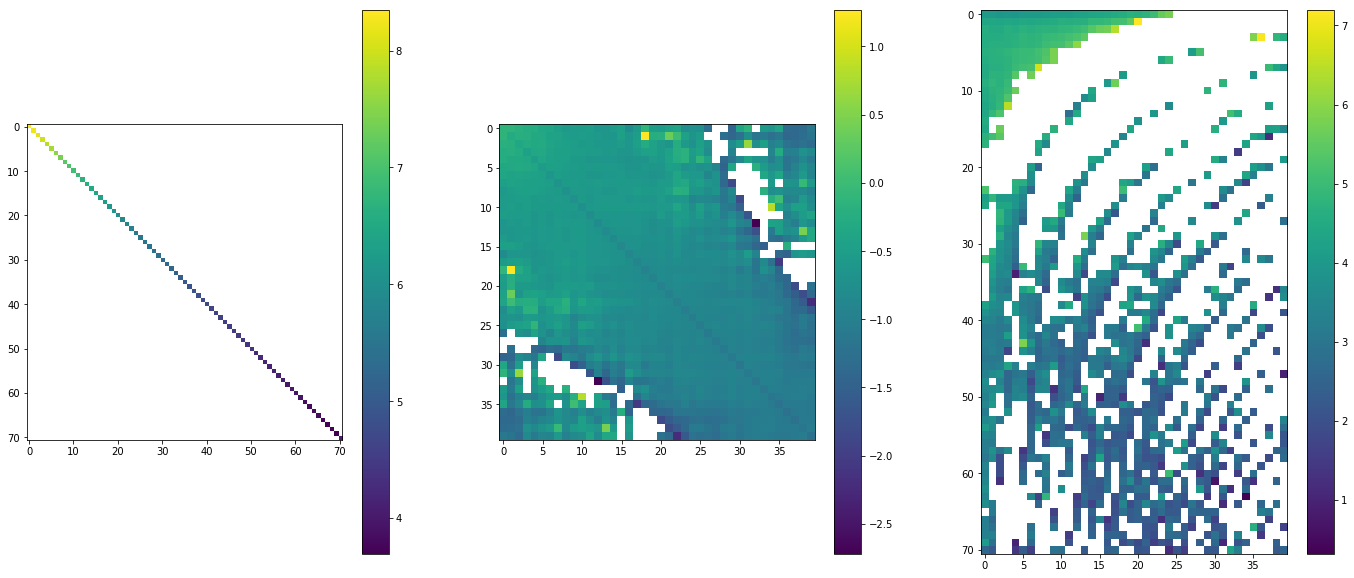

In [381]:
from utils import *
fig, (ax, ax2, ax3) = plt.subplots(1,3, figsize = (24,10))
im = ax.imshow( np.log10(covp0[:71,:71]/covp_A) )#[:71,:])
im2 = ax2.imshow( np.log10(covxi0/covxi_A[:-1, :-1]))
im3 = ax3.imshow( np.log10(covpxi0[:71,:]/covpxi_A[:,:-1]))
fig.colorbar(im,ax=ax)
fig.colorbar(im2,ax=ax2)
fig.colorbar(im3,ax=ax3)


In [349]:
XXA.shape

(71, 41)

ValueError: operands could not be broadcast together with shapes (429,0) (0,0) 

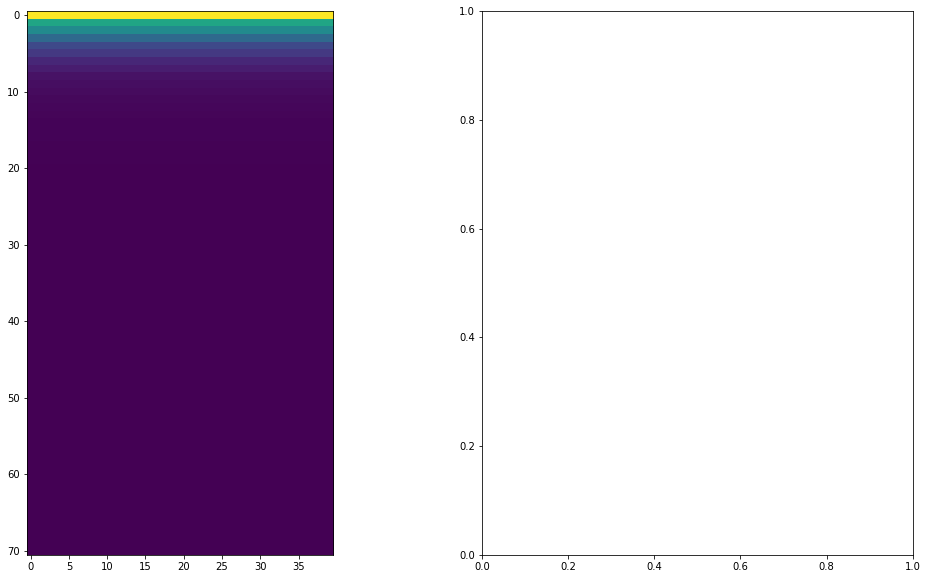

In [348]:
from utils import *
fig, (ax, ax2) = plt.subplots(1,2, figsize = (17,10))
im = ax.imshow((PP[:71,:]/PPA[:71,:40]))#[:71,:])
im2 = ax2.imshow((XX[71:,71:] / XXA[71:,71:]))
fig.colorbar(im,ax=ax)
fig.colorbar(im2,ax=ax2)

#ax.set_xticks(np.linspace(0, rcenter.size, 10))
#ax.set_yticks(np.linspace(0, kcenter[0:71].size, 10))
#klabels = ['{:>2.3f}'.format(r) for r in np.linspace(kcenter[0:71].min(), kcenter[0:71].max(), 10) ]
#rlabels = ['{:>2.0f}'.format(r) for r in np.linspace(rcenter.min(), rcenter.max(), 10) ]
#ax.set_xticklabels(rlabels)
#ax.set_yticklabels(klabels)

#ax2.set_xticks(np.linspace(0, rcenter.size, 10))
#ax2.set_yticks(np.linspace(0, kcenter[0:71].size, 10))
#ax2.set_xticklabels(rlabels)
#ax2.set_yticklabels(klabels)